This notebook loads MNIST data into numpy and plots digits

Code amended from https://github.com/hsjeong5/MNIST-for-Numpy

In [2]:
import gzip
import os
import pickle
from urllib import request

import numpy as np


Save current working directory and set directories

In [3]:
base_path = 'data/MNIST'

cwd = os.getcwd()
os.chdir('../base')

Download and structure data

In [4]:
filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]




def download_mnist():
    base_url = "https://ossci-datasets.s3.amazonaws.com/mnist/"
    for name in filename:        
        url = base_url+name[1]
        outfile = f'{base_path}/{name[1]}'
        if not os.path.exists(outfile):
            print("Downloading "+name[1]+"...")
            request.urlretrieve(url, outfile)

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(f'{base_path}/{name[1]}', 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(f'{base_path}/{name[1]}', 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open(f"{base_path}/mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

os.makedirs(base_path, exist_ok=True)

download_mnist()
save_mnist()

with open(f"../base/data/mnist/mnist.pkl",'rb') as f:
    mnist = pickle.load(f)
X_train,y_train,X_test,y_test = \
    mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]





Save complete.


Create plot

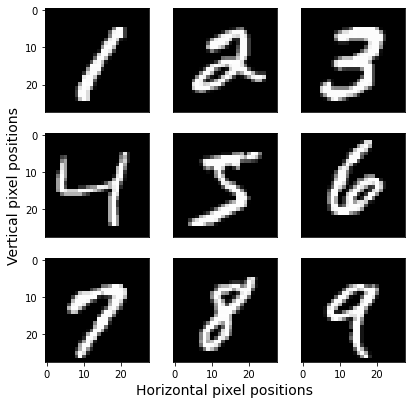

In [7]:
from matplotlib import pyplot as plt

outfile_digit = 'fig/mnist/digits.png'

if not os.path.exists(outfile_digit):
    f, ax = plt.subplots(3,3,figsize=(6.5, 6.5)) 
    for i in range(9):  
        ax_ = ax[i//3][i%3]    
        digit = X_train[y_train==i+1][0].reshape(28,28)
        ax_.imshow(digit, cmap=plt.get_cmap('gray'))
        if i//3<2:
            ax_.get_xaxis().set_visible(False)
        else:
            ax_.set_xticks([0,10,20])
        if i%3>0:
            ax_.get_yaxis().set_visible(False)
        ax[2][1].set_xlabel('Horizontal pixel positions',size=14)
        ax[1][0].set_ylabel('Vertical pixel positions',size=14)

    f.savefig(outfile_digit, dpi=200)

Change working dir back

In [ ]:
os.chdir(cwd)